### Sobel Pipeline with Noise Reduction

<ol>
<li>Grayscale conversion: The input image is first converted into a grayscale image to simplify the processing.</li>

<li>Noise reduction: Various techniques can be used to reduce noise in the image, such as Gaussian blur, median filtering, or bilateral filtering. These techniques help to smooth out the image and reduce the impact of noise on the edge detection process.</li>

<li>Horizontal and vertical Sobel filtering: The Sobel operator is applied to the noise-reduced grayscale image in both the horizontal and vertical directions. The Sobel operator is a small 3x3 matrix that is convolved with the image. The result of this convolution highlights edges in the image.</li>

<li>Magnitude calculation: The horizontal and vertical edge maps are combined to obtain a single edge map. This is done by calculating the magnitude of the gradient at each pixel. The magnitude is computed using the Pythagorean theorem, which involves taking the square root of the sum of the squares of the horizontal and vertical gradients.<br>
</li>

<li>Thresholding: Finally, a threshold is applied to the edge map to produce a binary image, where the edges are represented by white pixels and the non-edges are represented by black pixels. This threshold is usually set to a value that separates the edges from the non-edges based on the magnitude of the gradient.</li>

</ol>

Text(0.5, 1.0, 'Grayscale+gaussian')

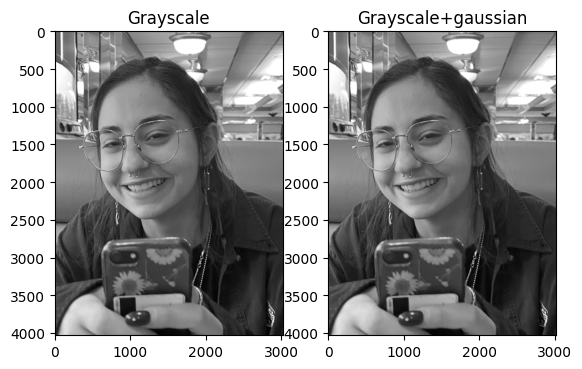

In [1]:
# Sobel Pipeline
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('proj1/img1.jpg')

fig = plt.figure(figsize = (10,10))

#1.Grayscale conversion
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Grayscale image
fig.add_subplot(1,3,2)
plt.imshow(img, cmap='gray')
plt.title('Grayscale')

#2.Noise reduction with gaussian
gaussian_filter = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype=np.float32) / 16
img = cv2.filter2D(img, -1, gaussian_filter)

#Grayscale and noise reduced image
fig.add_subplot(1,3,3)
plt.imshow(img, cmap='gray')
plt.title('Grayscale+gaussian')

Text(0.5, 1.0, 'Sobel x+y')

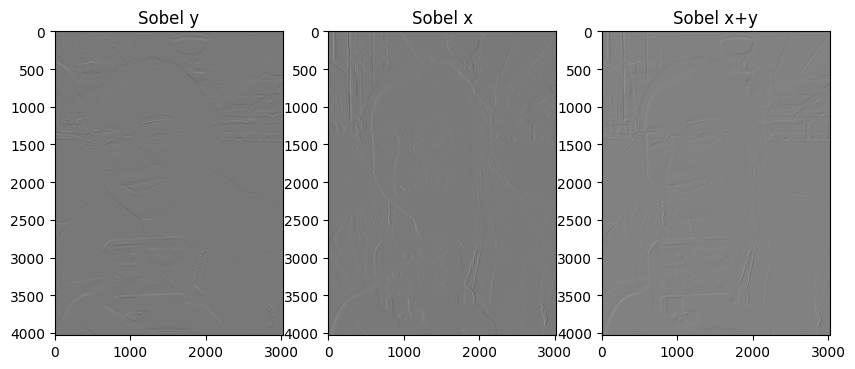

In [2]:
#3.Sobel filtering
fig = plt.figure(figsize = (10,10))

#Another way of doing things
# sobely_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype=np.float32) / 16
# sobelx_filter = np.array([[1,2,1],[0,0,0],[-1,-2,-1]], dtype=np.float32) / 16
# sobelX = cv2.filter2D(img, -1, sobelx_filter)
# sobelY = cv2.filter2D(img, -1, sobely_filter)
# img = cv2.add(sobelX, sobelY)

#Sobel y
sobely=cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
#Sobel y image
fig.add_subplot(1,3,1)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel y')

#Sobel x
sobelx=cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
#Sobel x image
fig.add_subplot(1,3,2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel x')

#Sobel x+y image
img = cv2.add(sobelx, sobely)
fig.add_subplot(1,3,3)
plt.imshow(img, cmap='gray')
plt.title('Sobel x+y')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

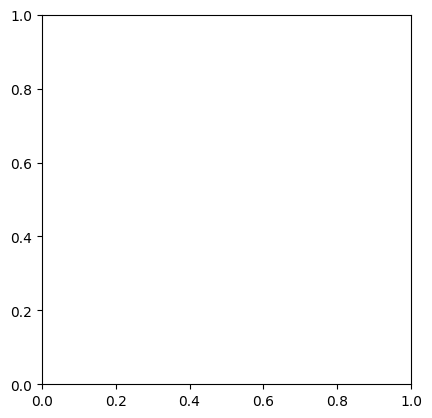

In [5]:
#4.)Magnitude
magn = cv2.magnitude(sobelx, sobely)

#5.)Threshold
imgOcvThres = cv2.threshold(magn, 100, 255, cv2.THRESH_BINARY)


h = img.shape[0]
w = img.shape[1]
imgThres = np.zeros((img.shape[0],img.shape[1]), dtype=np.uint8)

for y in range(0,h):
#Search each pixel in the row
    for x in range(0,w):
    
        #If the pixel value is above the threshold set it to white.  If it is below set it to black.
        if (img[y,x] > magn[y,x]):
            imgThres[y,x] = 255
        else:
            imgThres[y,x] = 0
plt.imshow(imgOcvThres)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

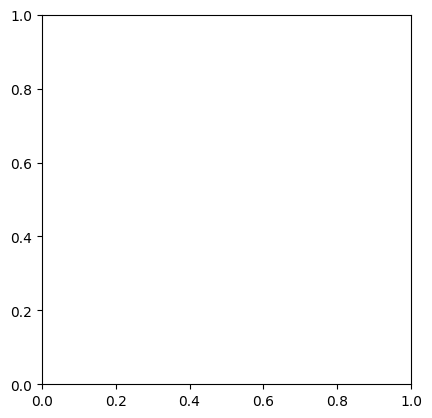

In [1]:
# Sobel Pipeline
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('proj1/img1.jpg')

gaussian_filter = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype=np.float32) / 16
img = cv2.filter2D(img, -1, gaussian_filter)

blur = cv2.GaussianBlur(img, (3,3), 0)

sobely=cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
sobelx=cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)

magn = cv2.magnitude(sobelx, sobely)

imgOcvThres = cv2.threshold(magn, 100, 255, cv2.THRESH_BINARY)

plt.imshow(imgOcvThres, cmap='gray')